In [6]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models , transforms 
from matplotlib import pyplot as plt
import time
import os
import copy

In [7]:
plt.ion() # interactive mode

In [8]:
# Problem: Differentiateing Ants and Bees

# Data aug and normalizing for training and validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # ??
        transforms.RandomHorizontalFlip(), # ???
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256), # ??
        transforms.CenterCrop(224), #??
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])        
    ]),
}

In [16]:
data_dir = '/home/sarthak/Desktop/data/pytorch/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x), data_transforms[x]) for x in ['train', 'val']} 
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']} 
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

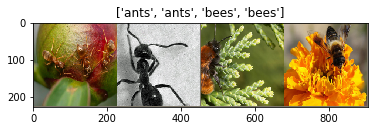

In [22]:
def imageShow(input_image, title=None):
    input_image = input_image.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input_image = std * input_image + mean
    input_image = np.clip(input_image, 0, 1)
    plt.imshow(input_image)
    
    if title is not None:
        plt.title(title)
    
    plt.pause(0.001)

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from the batch
out = torchvision.utils.make_grid(inputs)

imageShow(out, title=[class_names[x] for x in classes])

In [ ]:
# TRAINING AND SAVING THE MODEL

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {} / {}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a trainig and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # set model to training mode
            else:
                model.eval() # set model to evaluate mode
                
            running_loss = 0.0
            running_corrects = 0.0
            
            # Iterate over data
            for 